In [2]:
%load_ext autoreload
%autoreload 2

    
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#from TraceGenerator import AutoGenerator_multi, AutoGenerator_single
from TraceGenerator import TraceDataGeneration
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


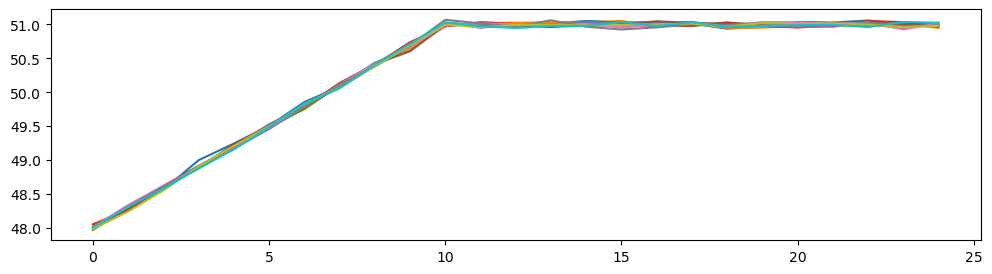

In [11]:
gen = TraceDataGeneration(n=10, global_noise=0.01)

step1 = gen.param('linear_transition', '1,1', start_value=48, end_value=51, time1=0, time2=10, length=15, level=10)
#step2 = gen.param('log_pulse', '2,1', start_value=48, end_value=48.5, time1=0, time2=60, b_coeff=50, length=200)
step2 = gen.param('constant', '2,1', start_value=51, length=10)
#step3 = gen.param('

trace = gen.generate_trace(step1, step2)
df = gen.make_trace_format(step1, step2)

plt.figure(figsize=(12,3))
for t in trace:
    plt.plot(t)

In [12]:
param_list = gen.param_list

In [13]:
param_list

{'trace1': {'step1_1': {'length': 15}, 'step2_1': {'length': 10}},
 'trace2': {'step1_1': {'length': 15}, 'step2_1': {'length': 10}},
 'trace3': {'step1_1': {'length': 15}, 'step2_1': {'length': 10}},
 'trace4': {'step1_1': {'length': 15}, 'step2_1': {'length': 10}},
 'trace5': {'step1_1': {'length': 15}, 'step2_1': {'length': 10}},
 'trace6': {'step1_1': {'length': 15}, 'step2_1': {'length': 10}},
 'trace7': {'step1_1': {'length': 15}, 'step2_1': {'length': 10}},
 'trace8': {'step1_1': {'length': 15}, 'step2_1': {'length': 10}},
 'trace9': {'step1_1': {'length': 15}, 'step2_1': {'length': 10}},
 'trace10': {'step1_1': {'length': 15}, 'step2_1': {'length': 10}}}

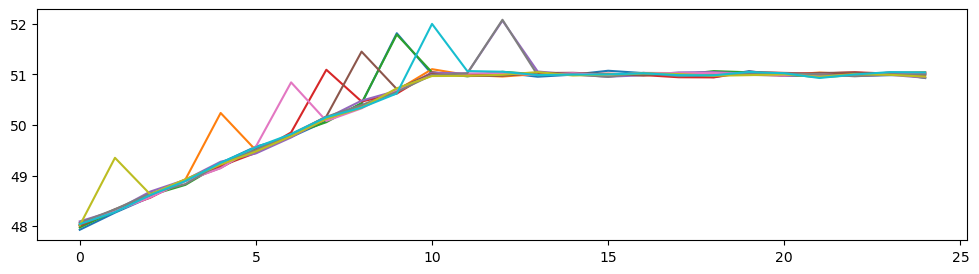

In [14]:
genf = TraceDataGeneration(n=10, param_list=param_list, trace=trace, global_noise=0.01)

step1 = genf.param('linear_transition', '1,1', start_value=48, end_value=51, time1=0, time2=10, length=15, fault='spike', level=1)
#step2 = gen.param('log_pulse', '2,1', start_value=48, end_value=48.5, time1=0, time2=60, b_coeff=50, length=200)
step2 = genf.param('constant', '2,1', start_value=51, length=10)

tracef = genf.generate_trace(step1, step2)
dff = genf.make_trace_format(step1, step2)

plt.figure(figsize=(12,3))
for t in tracef:
    plt.plot(t)

In [15]:
gen = TraceDataGeneration(n=10, global_noise=0.02)

step1 = gen.param('log_pulse', '1,1', start_value=48, end_value=51, time1=0, time2=199, b_coeff=10, length=200, jitter_point=150)
step2 = gen.param('log_pulse', '2,1', start_value=48, end_value=48.5, time1=0, time2=60, b_coeff=50, length=200)

trace = gen.generate_trace(step1, step2)
df = gen.make_trace_format(step1, step2)

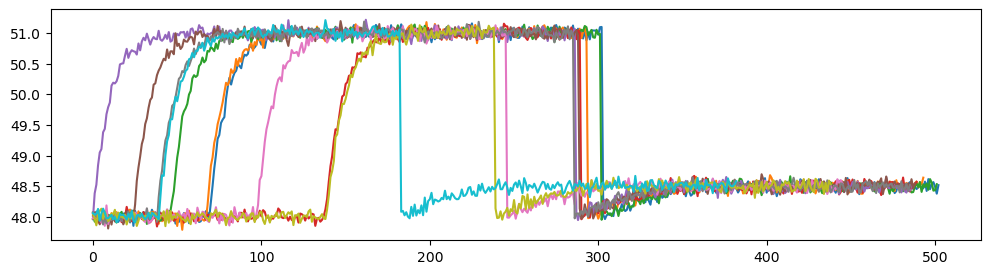

In [16]:
plt.figure(figsize=(12,3))
for t in trace:
    plt.plot(t)

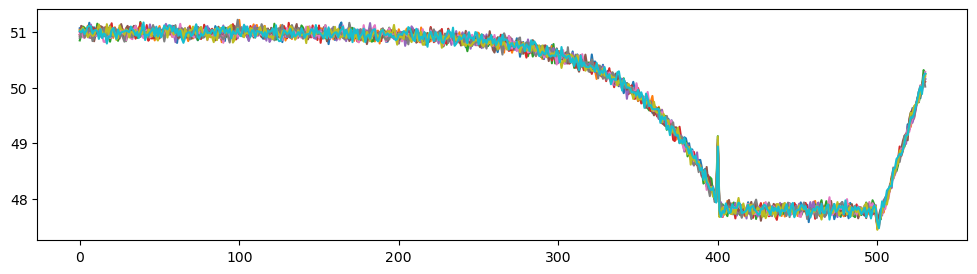

In [104]:
gen = TraceDataGeneration(n=10, global_noise=0.02)

step1 = gen.param('log_pulse', '1,1', start_value=51, end_value=48, time1=0, time2=399, b_coeff=50, length=400)
step2 = gen.param('impulse_like', '2,1', start_value=48, peak_value=49, end_value=47.8, time1=0, length=100)
step3 = gen.param('linear_transition', '3,1', start_value=47.5, end_value=50.2, time1=0, time2=30, length=31)

trace = gen.generate_trace(step1, step2, step3)
df = gen.make_trace_format(step1, step2, step3)

plt.figure(figsize=(12,3))
for t in trace:
    plt.plot(t)

In [105]:
param_list = gen.param_list

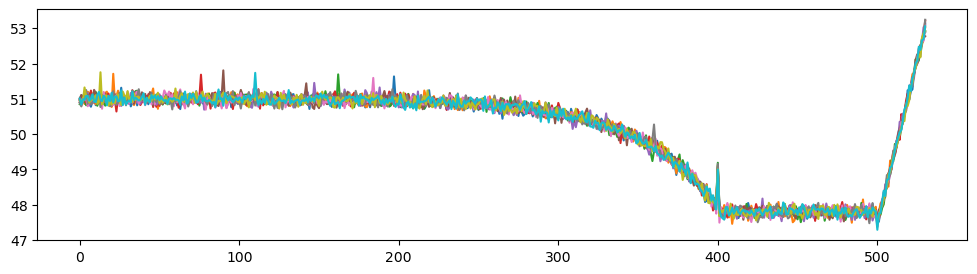

In [106]:
genf = TraceDataGeneration(n=10, param_list=param_list, trace=trace, global_noise=0.02)

step1 = genf.param('log_pulse', '1,1', start_value=51, end_value=48, time1=0, time2=399, b_coeff=50, length=400, fault='spike', level=1)
step2 = genf.param('impulse_like', '2,1', start_value=48, peak_value=49, end_value=47.8, time1=0, length=100)
step3 = genf.param('linear_transition', '3,1', start_value=47.5, end_value=53, time1=0, time2=30, length=31)

tracef = genf.generate_trace(step1, step2, step3)
dff = genf.make_trace_format(step1, step2, step3)

plt.figure(figsize=(12,3))
for t in tracef:
    plt.plot(t)

In [107]:
df = pd.concat(df)
dff = pd.concat(dff)

In [108]:
data = pd.concat([df, dff])

In [109]:
data['TIME'] = pd.date_range('2024-01-01', periods=data.shape[0], freq='0.1s')

In [111]:
data.to_csv('peak_fault_data.csv', index=False)